# Time-Frequency Methods in Analysis


### University of Calgary

$\vphantom{hey dude}$

### March 23, 2016

$\vphantom{hey dude}$

### Michael P. Lamoureux

**Abstract:**

Harmonic analysis is concerned with the representation of functions as the superposition of basic elements like sines and cosines. 

It is a generalization of Fourier series and Fourier transforms and has wide applicability in the study of partial differential equations, digital signal processing, image analysis and data compression. 

In this talk, we will look at some of the basics of time-frequency analysis, which focuses on the representation of a function in complementary variables such as time and frequency, or space and wave-number. We will look at how these methods are useful in modelling music and waves.

### Sub-abstract
This talk is written on a Jupyter Notebook. It includes text, TeX, and computer code. All in one place, for easy use and re-use. 

"Eat your own dogfood."

In [93]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

In [3]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))


In [4]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

display_animation(anim)

In [5]:
animation.Animation._repr_html_ = anim_to_html

In [6]:
# Here is some animation produced in Jupyter
display(anim)

## Taylor series

We learn in Calculus that it is often useful to express certain functions as a sum of monomials. For instance, 
$$\exp(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \cdots$$
or
$$\arctan(x) = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + \cdots$$

Fourier suggested for periodic functions, it is useful to write them as sums of sines and cosines. For instance:
$$ f(x) = \sin(x) + \frac{1}{3}\sin(3x) + \frac{1}{5}\sin(5x) + \cdots$$
is a familiar function.

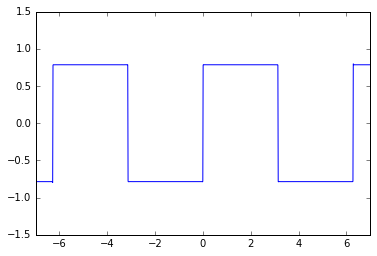

In [86]:
x=np.linspace(-7,7,1000)
y=0*x
for k in range(1,10000,2):
    y += sin(k*x)/k

plt.axes(xlim=(-7, 7), ylim=(-1.5, 1.5))
plt.plot(x,y)


Now Fourier was a smart cookie, he wasn't  interested in just any functions. 

He was interested in solved certain differential equations -- usually the heat equation, which was important for drilling cannons (the cannon and drill get really hot), and for hiking around Egypt (Fourier was also an archeologist). 

But let's look at the wave equation: 
$$\frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2} \mbox{ where } u = u(x,t).$$

Fourier realized if $u$ was the product of two sines, the 2nd derivative w.r.t. t would bring back a minus sin, as would the 2nd derivative w.r.t. x. So something like this would be a solution:

$$u(x,t) = \sin(x)\sin(t).$$

In [8]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, np.pi), ylim=(-1, 1))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, np.pi, 1000)
    y = np.sin(x)*np.sin(2*np.pi*i*.01)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=101, interval=20, blit=True)

display_animation(anim)

In [9]:
# Let's look at one period of that sin(x)sin(t)
display_animation(anim)

In [10]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, np.pi), ylim=(-1, 1))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, np.pi, 1000)
    y = np.sin(2*x)*np.sin(2*2*np.pi*i*.01)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=101, interval=20, blit=True)

display_animation(anim)

In [11]:
# The function sin(2x)sin(2t) also works
display_animation(anim)

In [12]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, np.pi), ylim=(-1, 1))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, np.pi, 1000)
    y = np.sin(5*x)*np.sin(5*2*np.pi*i*.01)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=101, interval=20, blit=True)

display_animation(anim)

In [13]:
# How about sin(5x)sin(5t) also works
display_animation(anim)

In general, functions of the form
$$ f_n(x,t) = \sin(nx)\sin(nt)$$
will be solutions to the wave equation. (For any integer n). 

They also satisfy boundary conditions $f(0,t) = 0 = f(\pi,t)$ and initial condition $f(x,0) = 0$.

Fourier realized all solutions (in some sense) could be written as a sum:
$$ f(x,t) = \sum_n a_n\sin(nx)\sin(nt)$$
for some coefficients $a_n$. 

This could include very complex solutions. As follows:

In [14]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, np.pi), ylim=(-1.4, 1.4))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, np.pi, 1000)
    y = 0*x
    for k in range(1,100):
        y += (1.0/k**2)*sin(k*x)*sin(k*2*np.pi*i*.01)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=501, interval=20, blit=True)

display_animation(anim)

In [15]:
# A complex waveform
display_animation(anim)

This last waveform is a representation of the motion of a violin string, under bowing.

Helmholtz knew this. Did you?

The formula is from a Fourier representation,

$$f(x,t) = \sum_n \frac{1}{n^2}\sin(nx)\sin(nt)$$

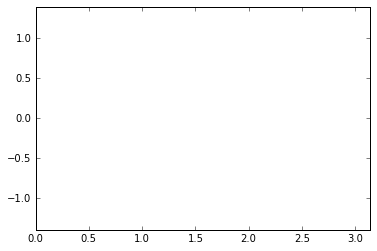

In [16]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, np.pi), ylim=(-1.4, 1.4))
line, = ax.plot([], [], lw=2)
plt.hold(True)

# initialization function: plot the background of each frame
def init():
    plt.plot([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, np.pi, 1000)
    y = 0*x
    for k in range(1,100):
        y += (1.0/k**2)*sin(k*x)*sin(k*2*np.pi*i*.01)
    plt.plot(x, y)
    plt.hold(True)
    return line,



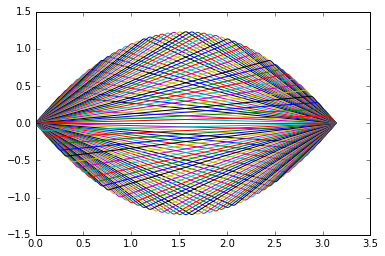

In [17]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim=animation.FuncAnimation(fig, animate, init_func=init,
                               frames=101, interval=20, blit=True)
display_animation(anim)

Our ears hear the variations in time. Periodic wavefoms have a tone. 

Our ears can detect the presence of harmonics in the waveform.

$$ \mbox{sinewave} = \sin(2\pi f t) \mbox{ versus  squarewave } = \sum_n \frac{1}{n} \sin(2\pi nft). $$

In [88]:
import sounddevice as sd
fs = 44100.
N = 3*fs
time = np.arange(N) / fs
freq = 440.
sinewave = np.sin(2*np.pi*freq*time)
sqwave = np.minimum(5*sinewave,1)
sqwave = np.maximum(5*sqwave,-11)

In [89]:
sd.play(sinewave, fs)

In [90]:
sd.play(sqwave, fs)

Periodic functions (which ones?) can be expressed as a linear combination of sines and cosines:

$$ f(t) = \sum_n a_n \cos(2\pi n t) + \sum_n b_n \sin(2\pi n t). $$


It is algebraically convenient to express the Fourier series above in terms of complex exponentials


$$ f(t) = \sum_n c_n e^{2\pi i n t}. $$

This "periodic" assumption implies that harmonics are at integer multiples of the basic frequency. 

The ancient Greeks knew this, and we often assume it for musical notes. But it is only an approximation.

we need more general transforms for richer collections of signals. 


The Fourier transform on the real line, expresses functions as a "continuous sum" of complex sinusoids. 

We can express the function $f(t)$ as an integral:

$$f(t) = \int_{-\infty}^\infty \hat{f}(\omega) e^{2\pi i \omega t} \, d\omega.$$

Notice this really looks like the Fourier series with the factor $e^{2\pi i n t}$ replaced by $e^{2\pi i \omega t}$, and the sum over integers $n$ replaced with an integral over reals $\omega$. 

The function $\hat{f}$ is called the Fourier transform of $f$.

Its value at frequency $\omega$ is a measure of how much energy at that frequence is present in the signal. 


The function $\hat{f}$ is easily computed as

$$\hat{f}(\omega) = \int_{-\infty}^\infty f(t) e^{-2\pi i \omega t} \, dt.$$

In 3-dimensional space, the Fourier transform generalizes to this:

$$f(\mathbf{x}) = \int_{\mathbb{R}^3} \hat{f}(\mathbf{w}) e^{2\pi i \mathbf{w\cdot x}} \, d\mathbf{w}.$$

In fact, the space $\mathbb{R}^3$ could be replaced with ANY locally compact abelian group.

Hence the rich applicability of Fourier theory. 

For instance, derivatives behave very well under the Fourier transform. 

From our last equation, 

$$f(\mathbf{x}) = \int_{\mathbb{R}^3} \hat{f}(\mathbf{w}) e^{2\pi i \mathbf{w\cdot x}} \, d\mathbf{w}.$$

we compute

$$\nabla f(\mathbf{x}) = 
\int_{\mathbb{R}^3} \hat{f}(\mathbf{w}) \left[ \nabla e^{2\pi i \mathbf{w\cdot x}} \right] \, d\mathbf{w} =
\int_{\mathbb{R}^3} \left[ 2\pi i \mathbf{w}\hat{f}(\mathbf{w}) \right] e^{2\pi i \mathbf{w\cdot x}} \, d\mathbf{w}.
$$

Which tells us the Fourier transform of $\nabla f$ is $2\pi i \mathbf{w}\hat{f}(\mathbf{w})$. 

That is the gradient (derivative) is transformed into a multiplication operator. 


A (constant coefficient) wave equation

$$ \frac{\partial^2 u}{\partial t^2} - \nabla^2 u = 0$$

transformed over the spatial variable $\mathbf{x}$ becomes

$$ \frac{\partial^2 \hat{u}}{\partial t^2} + 4\pi^2 |\mathbf{w}|^2 \hat{u} = 0$$

Which is really just an ODE in t. (Notice the multiplier $|\mathbf{w}|^2$ is a polynomial.)

This is Helmholtz equation, and suggests one way to solve the wave equation is to solve for each frequency individually. 

### Pseudodifferential operators

When the linear PDE has non-constant coefficients, the differential operator can be expressed in the form

$$Df(\mathbf{x}) = \int_{\mathbb{R}^3} a(\mathbf{x},\mathbf{w}) \hat{f}(\mathbf{w}) e^{2\pi i \mathbf{w\cdot x}} \, d\mathbf{w}$$

where the function $a(\mathbf{x},\mathbf{w}) = \sum_k a_k(\mathbf{x})\mathbf{w}^k$ is a polynomial in $\mathbf{w}$ with coefficients depending on $\mathbf{x}$.

Enlarge the class of functions allowed for $a(\mathbf{x},\mathbf{w})$ and you get the pseudo-differential operators. 

This function $a(\mathbf{x},\mathbf{w})$ gives space-wavenumber information about the operator. 

(Leading to micro-local analysis of PDEs, etc etc etc)



### Time-frequency analysis

The idea is to represent a function $f(t)$ as a sum of localized sinusoids. 

The Gabor transform (Denis Gabor) expresses the function as sinusoids modified by Gaussians:

$$f(t) = \int \int G_f(s,\omega) e^{2\pi i s\omega} e^{-(s-t)^2} \, ds \, d\omega.$$

The S-transform (Robert Stockwell) varies the width of the Gaussian, and adds a phase shift:

$$f(t) = \int \int S_f(s,\omega) e^{2\pi i (s-t)\omega} e^{-(s-t)^2\omega^2} \, ds \, d\omega.$$




### Time-frequency analysis

The S-transform is a special case of the continuous wavelet transform (Morley, Meyers, Daubechies, etc etc), 

which replaces the modulated sinusoid with any wavelet $\phi(t)$:

$$f(t) = \int \int W_f(s,a) \phi(\frac{s-t}{a}) \, ds \, da.$$

Here, $a = 1/\omega$ is the inverse of frequency, called the scale. 

### Note

Skipping a lot of detail about normalizing properly, and how to actually compute these transforms. 

However, it is all amazingly slick. 

All the transforms make an effort to extract local information about time. They all have their merits and drawbacks. 

Even in simple waveforms, they are very informative.

Consider a simple rising chirp:

$$f(t) = \sin(2\pi \omega(t) t),$$

where $\omega(t)$ is a slowly rising frequency. We can hear this.

In [51]:
import sounddevice as sd
from scipy import signal
import matplotlib.pyplot as plt

In [92]:
fs = 22050.
N = 10*fs
t = np.arange(N) / fs
w = np.linspace(1000, 2000, N)
x = np.sin(2*np.pi*w*t)
sd.play(x, fs)


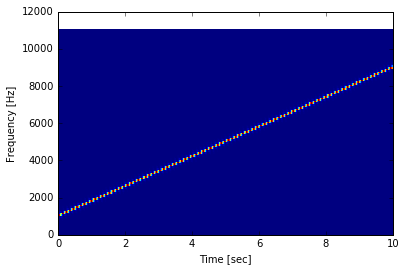

In [77]:
fxx, txx, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(txx, fxx, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [78]:

# This makes me nervous. It goes way higher than 5000Hz. Let's test

x = np.sin(2*np.pi*w*t) + np.sin(2*np.pi*1000*t) + np.sin(2*np.pi*5000*t)
sd.play(x, fs)

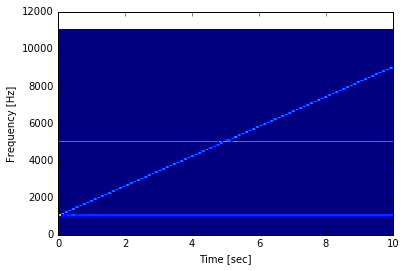

In [59]:
fxx, txx, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(txx, fxx, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


### Time-frequency Multiplier

Just as with pseudodifferential operators, we can introduce linear operators via multiliers

The Gabor multiplier:

$$A_G f(t) = \int \int a(s,\omega) G_f(s,\omega) e^{2\pi i s\omega} e^{-(s-t)^2} \, ds \, d\omega.$$

The S-multiplier:

$$A_S f(t) = \int \int a(s,\omega) S_f(s,\omega) e^{2\pi i (s-t)\omega} e^{-(s-t)^2\omega^2} \, ds \, d\omega.$$

The wavelet multiplier:

$$A_W f(t) = \int \int A(s,a) W_f(s,a) \phi(\frac{s-t}{a}) \, ds \, da.$$



### Theorem (Gibson, L, Margrave. 2013)

Exact formulas for describing a pseudodifferential operator in terms of a Gabor multiplier, and vice versa. 

### Applications

Wave field propagators for seismic imaging.

### Low hanging fruit

What about S-sultipliers, Wavelet-multipliers?

# Thank you for your attention

# To do:

- what you hear is related to the time varying parts
- note the harmonic, go as integers
- the Greeks knew this. Did you?

- with a bending moment, the harmonics are not as integers
- give an example
- plot to compare with harmonic case
- can we hear this

- for a drum head, zeros of some functions
- for a weighted drum head, you can get integer harmoncs

- Fourier transfors,
- short time Fourier transforms
- Gabor transforms
- wavelet transforms

- linear operators in this domain
- differential operators
- pseudodifferential operators
- Gabor multipliers

- Some applications